# Scenario discovery - replication assignment
In this exercise, you will replicate the results from three influential papers in the field of decision-making under uncertainty. By working through these cases, you will gain hands-on experience in applying the Patient Rule Induction Method (PRIM) to identify policy vulnerabilities, develop Shared Socio-economic Pathways (SSPs), and design adaptive decision-making strategies.

Replicate the results found in:

1. [Bryant et al (2010)](https://doi.org/10.1016/j.techfore.2009.08.002), which introduces the "scenario discovery" approach.
2. [Rozenberg et al (2014)](https://doi.org/10.1007/s10584-013-0904-3), which proposes a "backwards" approach to SSP development.
3. [Hamarat et al (2013)](https://doi.org/10.1016/j.techfore.2012.10.004), which presents an iterative computational model-based approach for adaptive decision-making.

The data files are in the [data](data) folder and named in line with the papers. The full details for these papers can be found the course guide. Rozenberg et al and Hamarat et al are optional readings for these weeks. You can also look at [Kwakkel & Jaxa-Rozen (2016)](https://doi.org/10.1016/j.envsoft.2015.11.020), which gives a succinct summary of these three cases.

An additional useful, if dated, resource for Bryant et al is [Scenario discovery in Python](https://waterprogramming.wordpress.com/2015/08/05/scenario-discovery-in-python/) from the Water Programming blog.

You can use use the `%matplotlib notebook` [magic](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib) for interaction with the trade-off curves. You can revert back to inline with `%matplotlib inline`.

## 1. Bryant & Lempert
> Bryant and Lempert's ["Thinking inside the box"](https://doi.org/10.1016/j.techfore.2009.08.002) introduces "scenario discovery," a computer-assisted method for identifying policy vulnerabilities using statistical or data-mining algorithms on simulation data. The approach is demonstrated on a U.S. renewable energy policy problem, addressing challenges faced in public debates.

Load the data using pandas. The experiments are in colums 2-10, while the outcome is in column 15. If you look at the paper carefully, you will see that they change the `peel_alpha` in [PRIM](https://emaworkbench.readthedocs.io/en/latest/ema_documentation/analysis/prim.html). This controls the leniency of the algorithm.

In [38]:
from ema_workbench.analysis import prim
import pandas as pd
from ema_workbench import ema_logging
import matplotlib.pyplot as plt

In [2]:
bryant = pd.read_csv("data/Bryant et al 2010.csv")

print(bryant.head())

   renew req %  Pricing  Cellulosic cost  Total biomass  \
0         0.25        1       124.900002     612.799988   
1         0.25        1        67.300003     837.200012   
2         0.25        1        71.000000     740.400024   
3         0.25        1        80.099998     995.599976   
4         0.25        1        76.400002     476.399994   

   Feedstock distribution  Cellulosic yield  Oil elasticity  \
0                    0.04         89.500000           0.206   
1                    0.18         95.900002           0.277   
2                    0.80         83.500000           0.445   
3                    0.58         82.400002           0.291   
4                    0.79         97.500000           0.443   

   Demand elasticity  Electricity coproduction  oil supply shift  \
0             -0.469                      1.83             0.078   
1             -0.380                      0.01            -0.032   
2             -0.778                      0.25            -0.0

[MainProcess/INFO] 882 points remaining, containing 89 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.05102040816326531, coverage: 0.5056179775280899, density: 1.0 restricted_dimensions: 6


<function matplotlib.pyplot.show(close=None, block=None)>

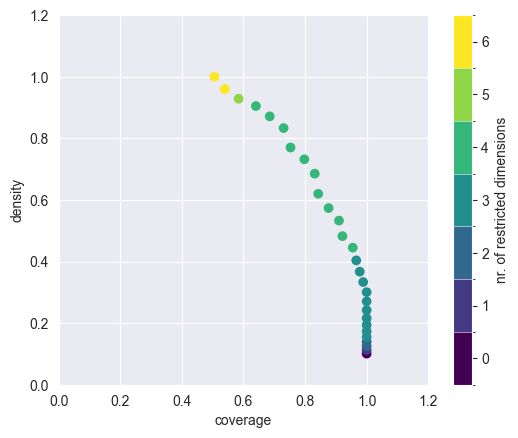

In [3]:
# Prepare the data for PRIM
x = bryant.iloc[:, 2:11]  # Adjust indices based on your data
y = bryant['Greater than 90%'].astype(bool)  # Outcome variable

ema_logging.log_to_stderr(ema_logging.INFO)

# Setup PRIM
prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)  # Adjust peel_alpha as needed

# Perform PRIM analysis to find the boxes
box1 = prim_alg.find_box()

# Show the results
box1.show_tradeoff()
plt.show

In [4]:
point = 21
box1.inspect(point)

coverage     0.752809
density      0.770115
id          21.000000
k           67.000000
mass         0.098639
mean         0.770115
n           87.000000
res_dim      4.000000
Name: 21, dtype: float64

                            box 21                                    
                               min         max      qp value  qp value
Total biomass           450.000000  755.799988           NaN  0.000005
Demand elasticity        -0.422000   -0.202000  1.184930e-16       NaN
Biomass backstop price  150.049995  199.600006  3.515113e-11       NaN
Cellulosic cost          72.650002  133.699997  1.574133e-01       NaN


[None]

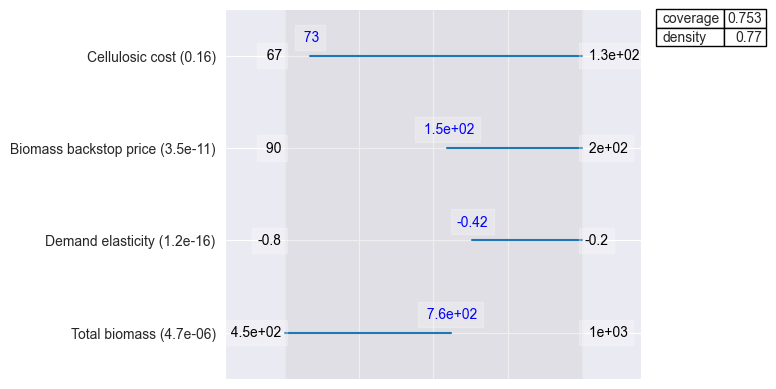

In [5]:
box1.inspect(point, style='graph')
plt.show()

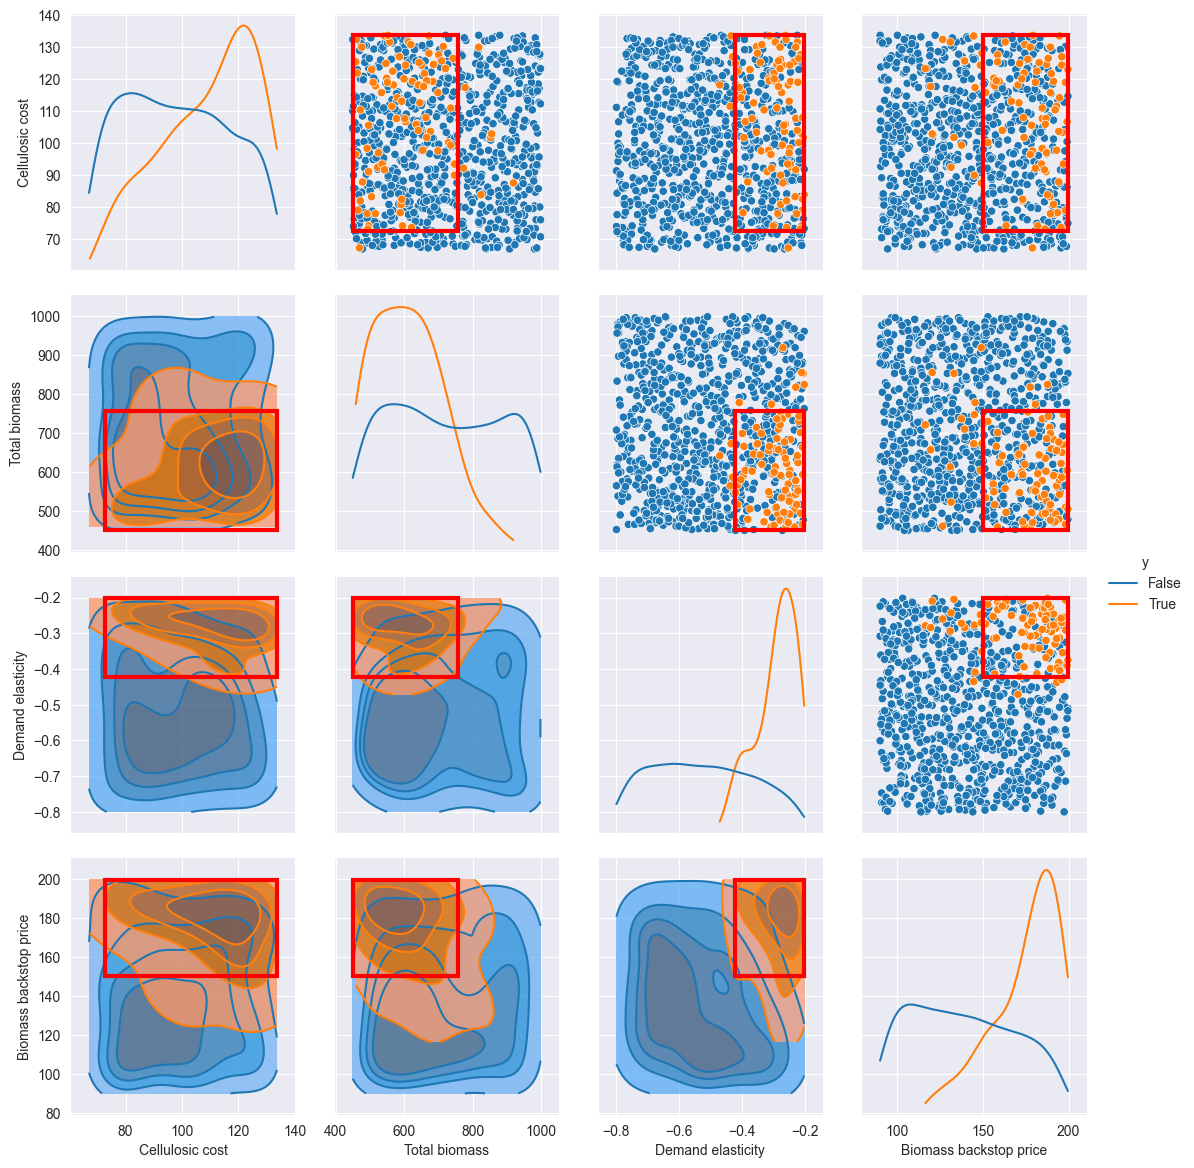

In [6]:
box1.select(21)
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

## 2. Rozenberg et al
> In ["Building SSPs for climate policy analysis,"](https://doi.org/10.1007/s10584-013-0904-3) Rozenberg et al. propose a "backwards" approach to develop Shared Socio-economic Pathways (SSPs) using potential drivers of mitigation and adaptation challenges. The method aids in focusing storylines on the most relevant driving forces.

* The experiments are the first seven columns. The remainder specify whether a given experiment belongs to a given SSP.
* Apply PRIM separately for each SSP
* you have to play with the threshold for each SSP, the default of 0.8 is at times too high
* if you look at the paper carefully, you will discover that they change some of the default parameters of PRIM

In [7]:
rozenberg = pd.read_csv("data/Rozenberg et al 2014.csv")

experiments = rozenberg.iloc[:, 0:7]
SSP1 = rozenberg.iloc[:, 7]
SSP2 = rozenberg.iloc[:, 8]
SSP3 = rozenberg.iloc[:, 9]
SSP4 = rozenberg.iloc[:, 10]

[MainProcess/INFO] 286 points remaining, containing 44 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.027972027972027972, coverage: 0.18181818181818182, density: 1.0 restricted_dimensions: 4


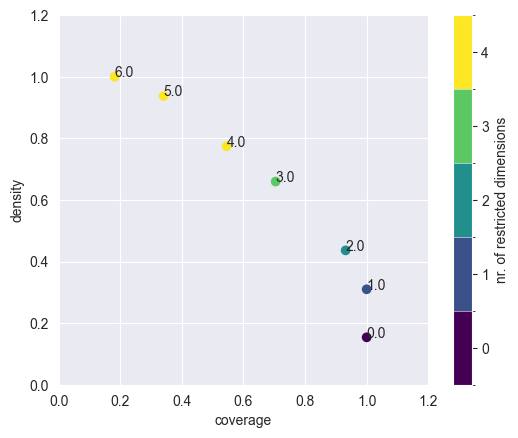

coverage     0.704545
density      0.659574
id           3.000000
k           31.000000
mass         0.164336
mean         0.659574
n           47.000000
res_dim      3.000000
Name: 3, dtype: float64

             box 3                         
               min  max  qp value  qp value
population     0.0  1.0       NaN  0.009555
behaviors      1.0  1.0  0.000003       NaN
inequalities   1.0  1.0  0.001675       NaN


C:\Users\jaspe\PycharmProjects\MBDM assignments\MBDM-project\.venv\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
C:\Users\jaspe\PycharmProjects\MBDM assignments\MBDM-project\.venv\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
C:\Users\jaspe\PycharmProjects\MBDM assignments\MBDM-project\.venv\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
C:\Users\jaspe\PycharmProjects\MBDM assignments\MBDM-project\.venv\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` 

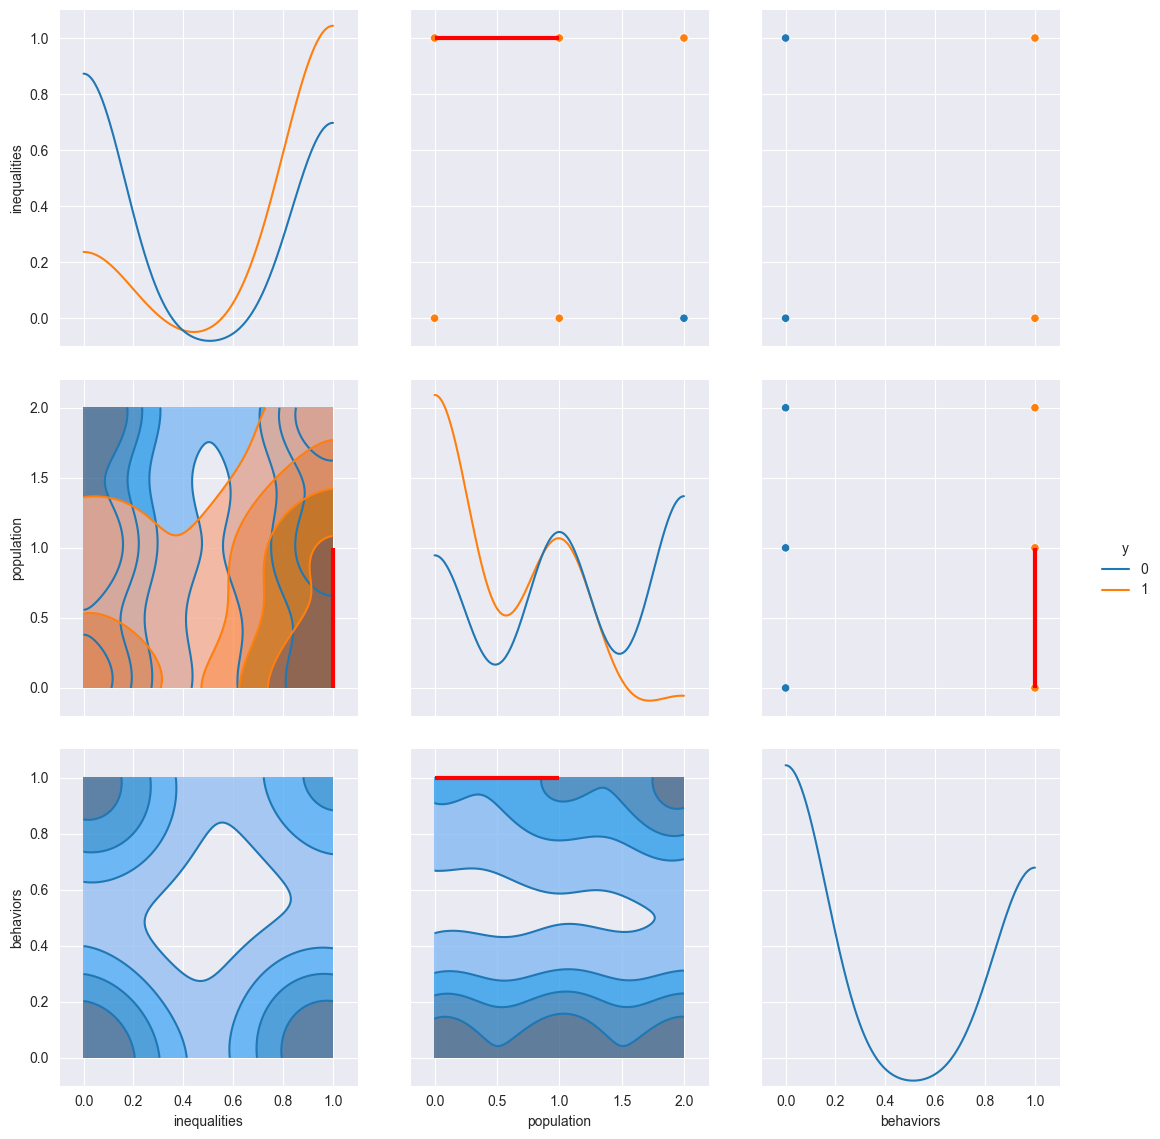

In [8]:
ema_logging.log_to_stderr(ema_logging.INFO)

# Peel alpha controls the leniency of the algorithm, the higher, the less lenient
# The meaning of peel_alpha is the percentile of the data that is to be removed
prim_obj = prim.Prim(experiments, SSP1, mass_min=0.001, threshold=0.95, 
                     peel_alpha=0.01)
box_SSP1 = prim_obj.find_box()

# Show the results
box_SSP1.show_tradeoff(annotated=True)
plt.show()

# Inspect a specific point on the trade-off curve
box_SSP1.inspect(3)
plt.show()

box_SSP1.select(3)
box_SSP1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [9]:
def analyze_with_prim(experiments, Y, to_inspect=3, thresh=0.8, note=False):
    """
    Perform PRIM analysis on the provided experiments using the outcome variable Y.

    Parameters:
    - experiments (DataFrame): The input data for the analysis.
    - Y (Series): The outcome variable for the analysis.

    Returns:
    - box: The PRIM box object containing the analysis results.
    """

    # Setup PRIM
    prim_obj = prim.Prim(experiments, Y, mass_min=0.001, threshold=thresh, peel_alpha=0.01)
    
    # Find the box
    box = prim_obj.find_box()

    # Show the trade-off plot
    box.show_tradeoff(annotated=note)
    plt.show()

    # Inspect a specific point on the trade-off curve
    box.inspect(to_inspect)
    plt.show()

    # Select a specific point on the trade-off curve
    box.select(to_inspect)

    # Show the pairs scatter plot
    box.show_pairs_scatter(to_inspect)
    fig = plt.gcf()
    fig.set_size_inches(12, 12)
    plt.show()

    return box

[MainProcess/INFO] 286 points remaining, containing 44 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.027972027972027972, coverage: 0.18181818181818182, density: 1.0 restricted_dimensions: 4


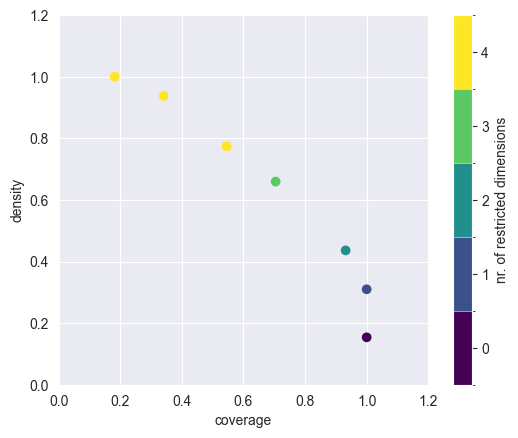

coverage     0.704545
density      0.659574
id           3.000000
k           31.000000
mass         0.164336
mean         0.659574
n           47.000000
res_dim      3.000000
Name: 3, dtype: float64

             box 3                         
               min  max  qp value  qp value
population     0.0  1.0       NaN  0.009555
behaviors      1.0  1.0  0.000003       NaN
inequalities   1.0  1.0  0.001675       NaN


C:\Users\jaspe\PycharmProjects\MBDM assignments\MBDM-project\.venv\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
C:\Users\jaspe\PycharmProjects\MBDM assignments\MBDM-project\.venv\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
C:\Users\jaspe\PycharmProjects\MBDM assignments\MBDM-project\.venv\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
C:\Users\jaspe\PycharmProjects\MBDM assignments\MBDM-project\.venv\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` 

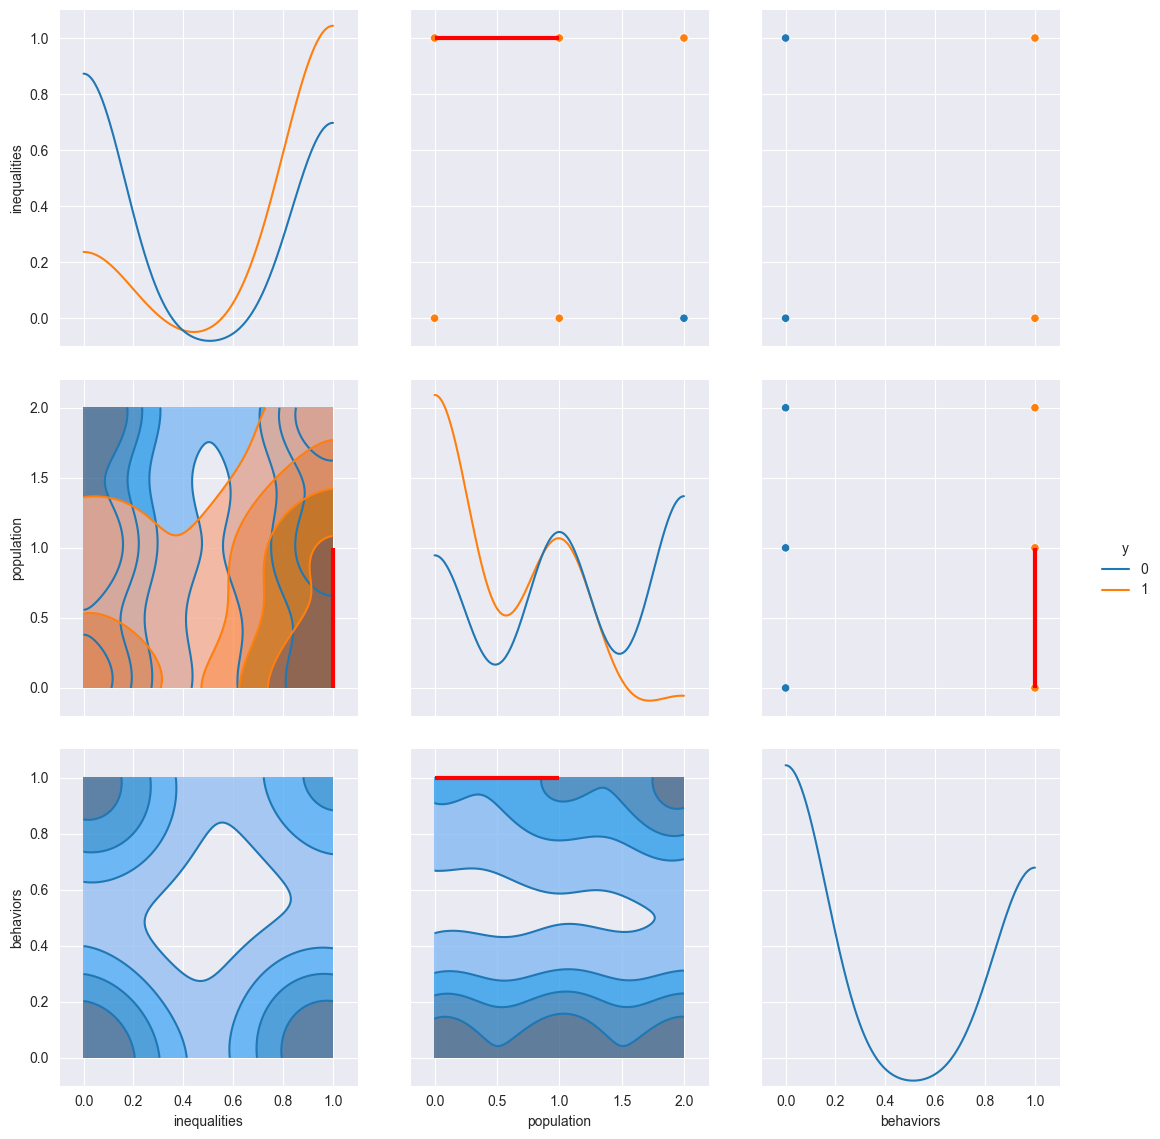

In [10]:
# Example usage:
# Assuming 'experiments' is your DataFrame containing the input data
# and 'SSP1' is your outcome variable
analyze_with_prim(experiments, SSP1, 3, 0.8)

[MainProcess/INFO] 286 points remaining, containing 23 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.055944055944055944, coverage: 0.6956521739130435, density: 1.0 restricted_dimensions: 4


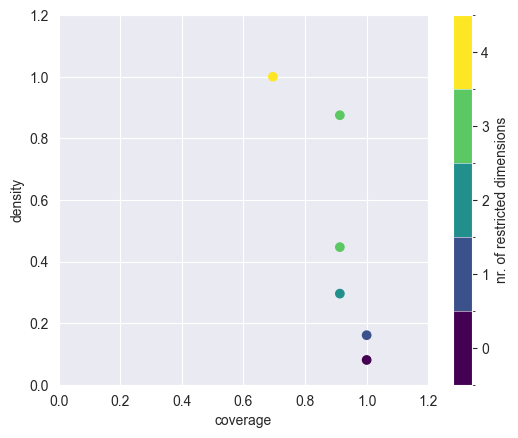

coverage     0.913043
density      0.446809
id           3.000000
k           21.000000
mass         0.164336
mean         0.446809
n           47.000000
res_dim      3.000000
Name: 3, dtype: float64

             box 3                         
               min  max  qp value  qp value
inequalities   0.0  0.0       NaN  0.000559
convergence    0.0  1.0       NaN  0.020052
behaviors      1.0  1.0  0.001689       NaN


C:\Users\jaspe\PycharmProjects\MBDM assignments\MBDM-project\.venv\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
C:\Users\jaspe\PycharmProjects\MBDM assignments\MBDM-project\.venv\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
C:\Users\jaspe\PycharmProjects\MBDM assignments\MBDM-project\.venv\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
C:\Users\jaspe\PycharmProjects\MBDM assignments\MBDM-project\.venv\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` 

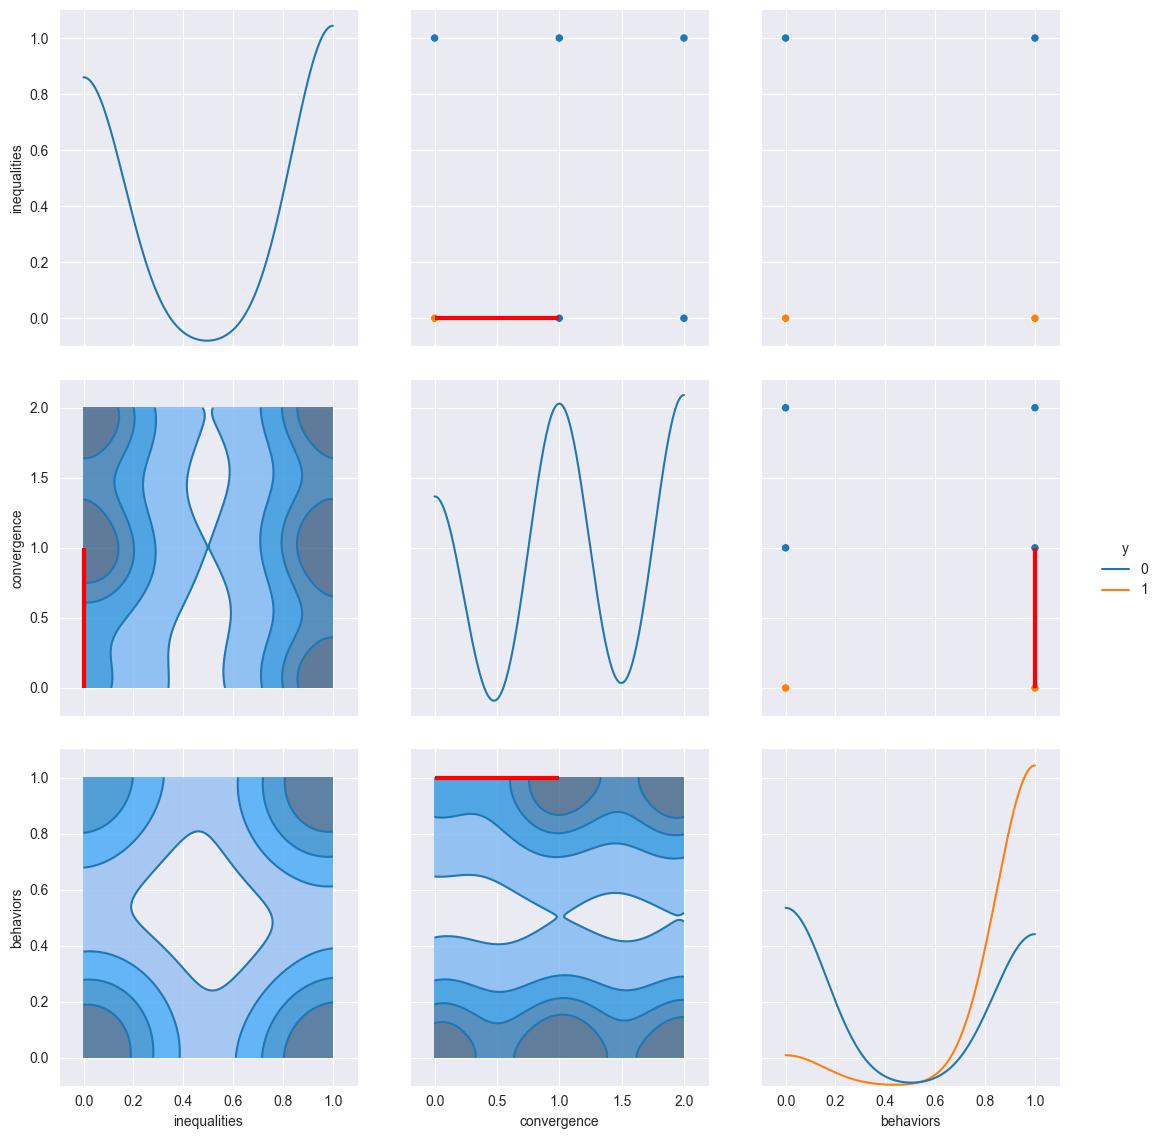

In [11]:
# Example usage:
# Assuming 'experiments' is your DataFrame containing the input data
# and 'SSP1' is your outcome variable
analyze_with_prim(experiments, SSP4, 3, 0.9)

## 3. Hamarat et al
> Hamarat, Kwakkel, and Pruyt's ["Adaptive Robust Design under deep uncertainty"](https://doi.org/10.1016/j.techfore.2012.10.004) presents an iterative computational model-based approach for adaptive decision-making under uncertainty. The approach combines adaptive policy-making, simulation models, data mining, and robust optimization, with potential applications in long-term structural transformations.

This is the most difficult dataset to analyze with prim. It has been generated using the ema_workbench and can be loaded with the `load_results` function. Experiments are of interest if the end state for `'fraction renewables'` is lower than the initial value.

* PRIM struggles with finding a good explanation for this case, why?
* [Dalal et al (2013)](https://www.sciencedirect.com/science/article/pii/S1364815213001345) suggest using PCA preprocessing. The ema_workbench supports this with the `pca_preprocess` function. See also examples/prim_PCA_preprocess.py. Does PCA preprocessing makes a difference for this case?


In [60]:
# To load the .gz file, you can use the load_results function
from ema_workbench import load_results

hamarat = load_results("data/Hamarat et al 2013.gz")

policies, outcomes = hamarat

fraction_renewables = outcomes["fraction renewables"]
y = fraction_renewables[:, -1] < fraction_renewables[:, 0]
x = policies

[MainProcess/INFO] results loaded successfully from C:\Users\jaspe\PycharmProjects\MBDM assignments\MBDM-project\Week 3-4 - vulnerability analysis\data\Hamarat et al 2013.gz


[ True False False ... False False  True]


In [54]:
prim_obj = prim.Prim(x, y, mass_min=0.05, threshold=0.1, peel_alpha=0.05)

[MainProcess/INFO] column model dropped from analysis because it has only one category
[MainProcess/INFO] column policy dropped from analysis because it has only one category


[MainProcess/INFO] 4738 points remaining, containing 679 cases of interest
[MainProcess/INFO] mean: 0.555984555984556, mass: 0.0518, coverage: 0.1653272101033295, density: 0.555984555984556 restricted_dimensions: 12


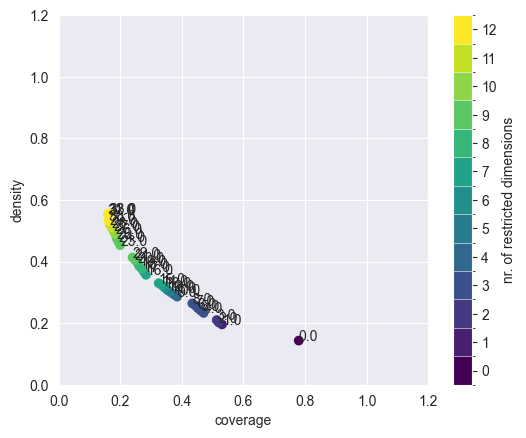

In [57]:
# Perform PRIM analysis to find the boxes
box3 = prim_obj.find_box()

box3.show_tradeoff(annotated=True)
plt.show()

In [58]:
box3.inspect_tradeoff()

alt.VConcatChart(...)

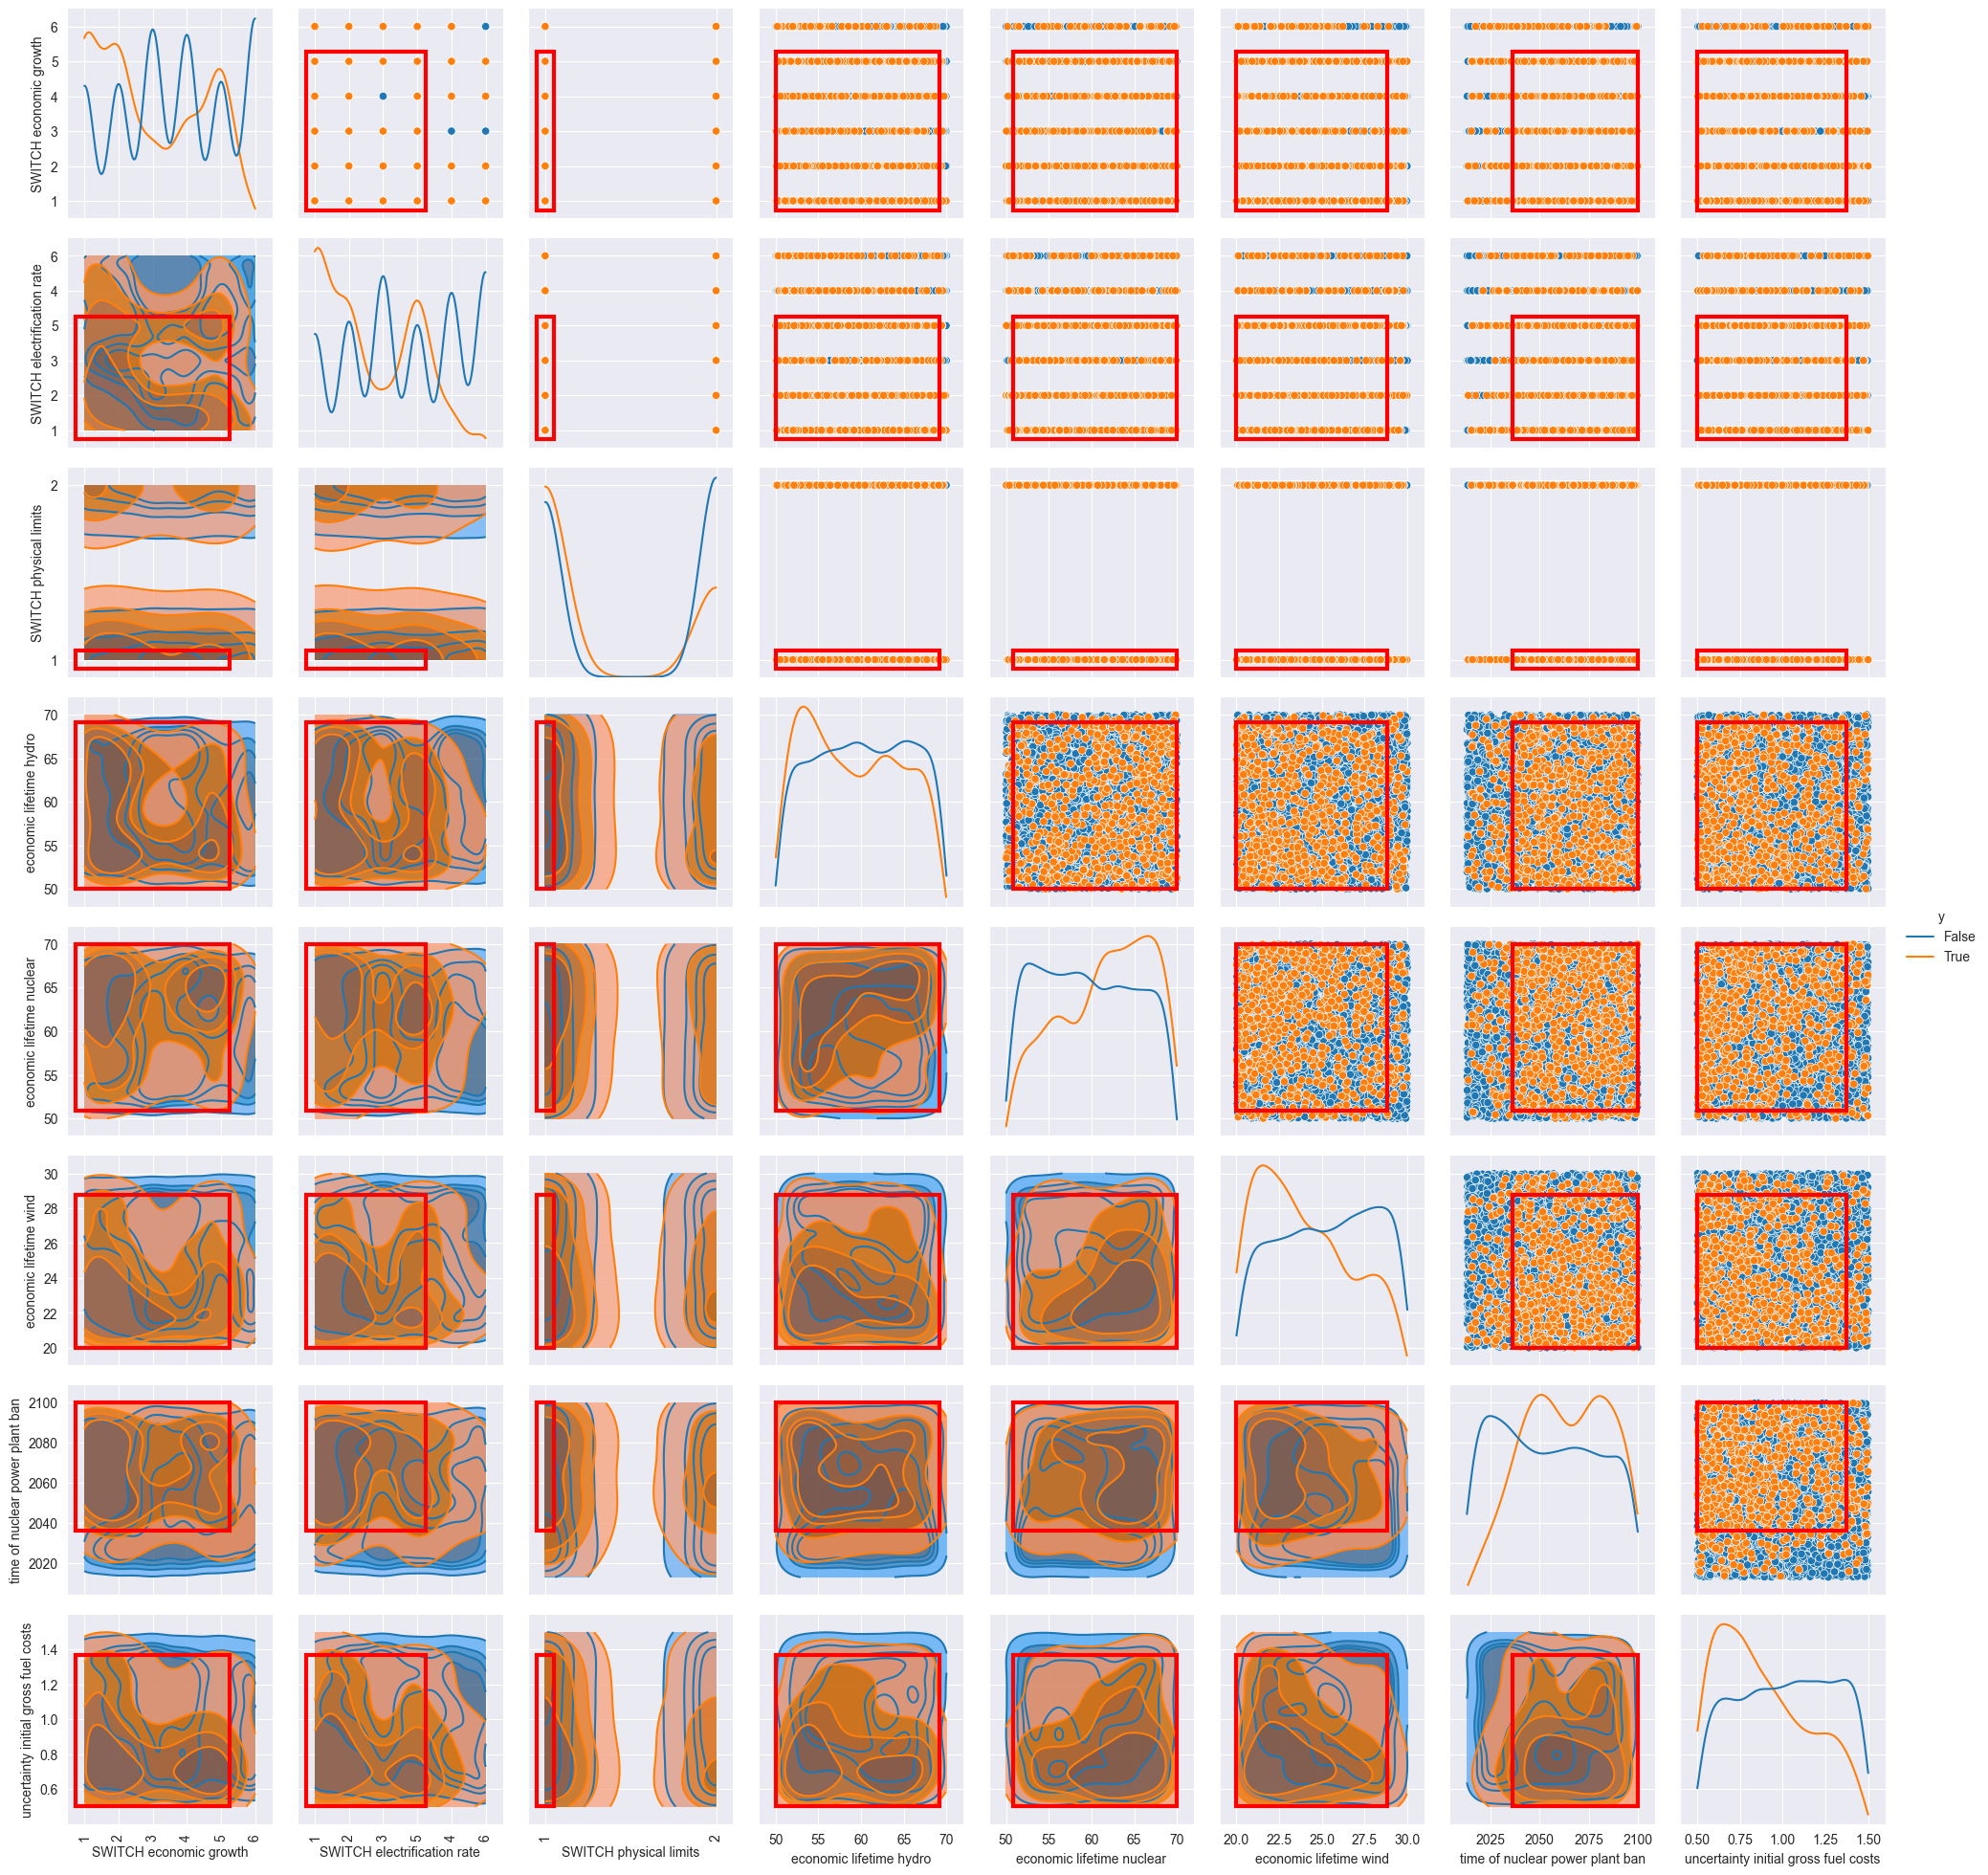

In [59]:
box3.show_pairs_scatter(19)
plt.show()

In [61]:
x_numeric = x.select_dtypes(exclude=pd.CategoricalDtype)
x_categorical = x.select_dtypes(include=pd.CategoricalDtype)

rotated_experiments, rotation_matrix = prim.pca_preprocess(x_numeric, y)

C:\Users\jaspe\AppData\Local\Temp\ipykernel_2800\2699126857.py:1: UserWarning: Instantiating CategoricalDtype without any arguments.Pass a CategoricalDtype instance to silence this warning.
  x_numeric = x.select_dtypes(exclude=pd.CategoricalDtype)
C:\Users\jaspe\AppData\Local\Temp\ipykernel_2800\2699126857.py:2: UserWarning: Instantiating CategoricalDtype without any arguments.Pass a CategoricalDtype instance to silence this warning.
  x_categorical = x.select_dtypes(include=pd.CategoricalDtype)


In [62]:
rotated_x = pd.concat([rotated_experiments, x_categorical], axis=1)

In [63]:
prim_obj = prim.Prim(rotated_x, y, mass_min=0.05, threshold=0.1, peel_alpha=0.05)
box4 = prim_obj.find_box()

[MainProcess/INFO] column model dropped from analysis because it has only one category
[MainProcess/INFO] column policy dropped from analysis because it has only one category
[MainProcess/INFO] 5000 points remaining, containing 871 cases of interest
[MainProcess/INFO] mean: 0.84375, mass: 0.0576, coverage: 0.27898966704936856, density: 0.84375 restricted_dimensions: 13


In [64]:
box4.inspect_tradeoff()

alt.VConcatChart(...)

In [ ]:
box4.show_pairs_scatter()
plt.show()

[MainProcess/INFO] column model dropped from analysis because it has only one category
[MainProcess/INFO] column policy dropped from analysis because it has only one category
[MainProcess/INFO] 5000 points remaining, containing 871 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.0084, coverage: 0.04822043628013777, density: 1.0 restricted_dimensions: 34


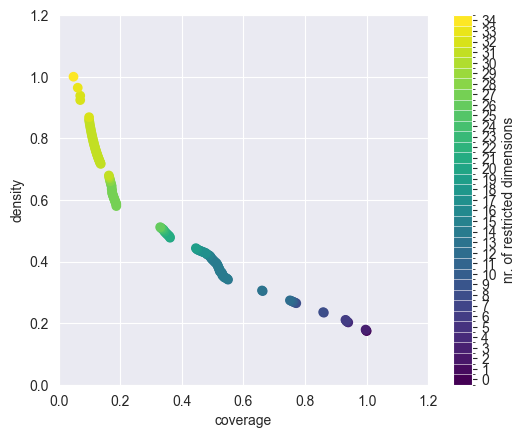

coverage       0.996556
density        0.178932
id             3.000000
k            868.000000
mass           0.970200
mean           0.178932
n           4851.000000
res_dim        3.000000
Name: 3, dtype: float64

                                             box 3                       \
                                               min        max  qp value   
economic lifetime wind                   20.000858  29.899976       NaN   
progress ratio pv                         0.751497   0.899972  0.389503   
weight factor marginal investment costs   1.087635   9.999217  0.392040   

                                                   
                                         qp value  
economic lifetime wind                   0.389503  
progress ratio pv                             NaN  
weight factor marginal investment costs       NaN  


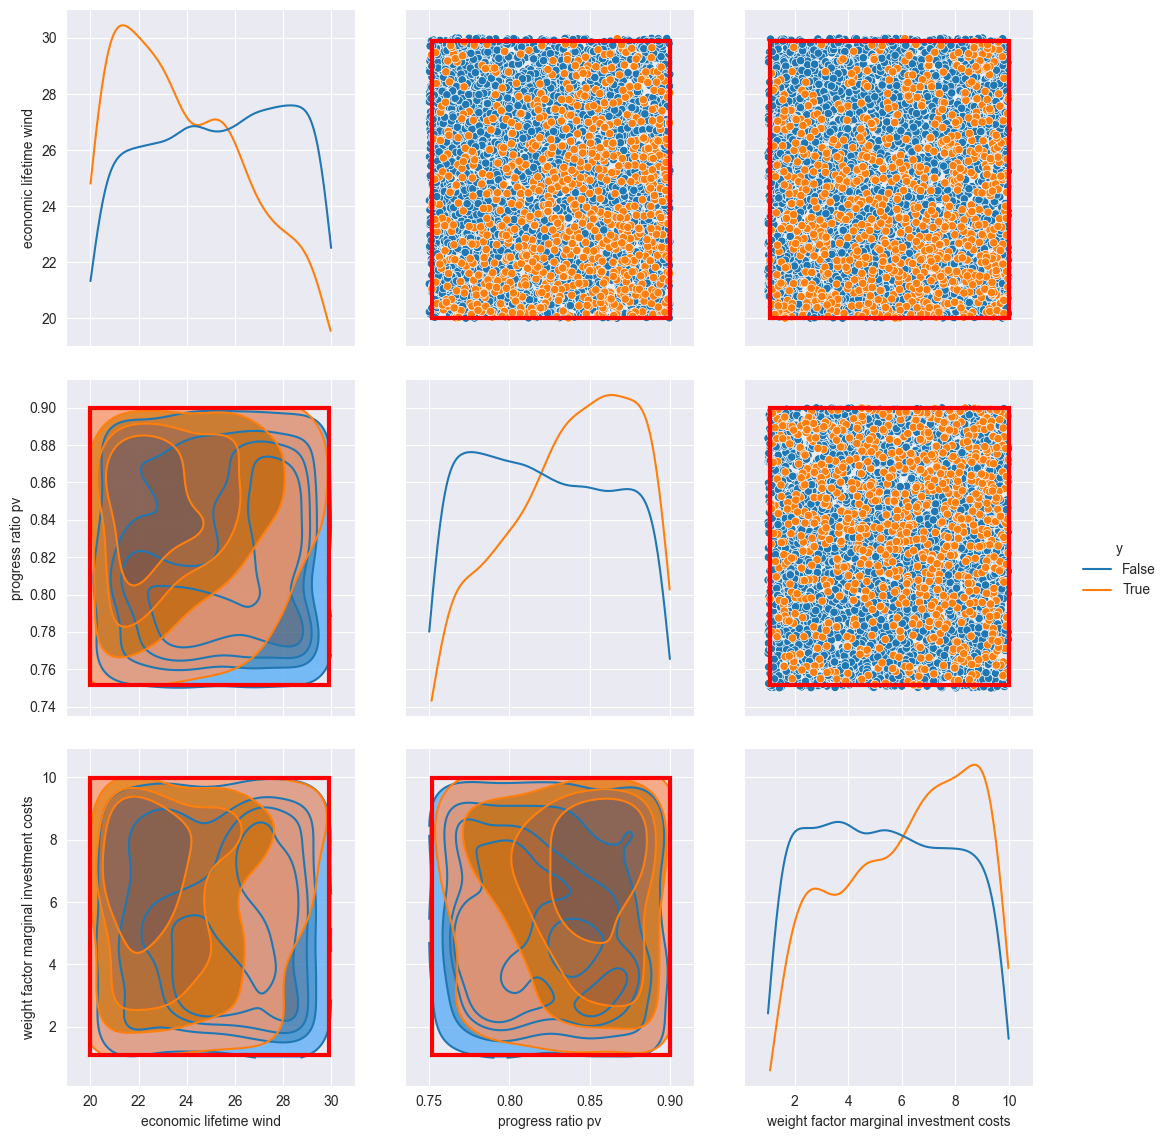

In [40]:
analyze_with_prim(policies, y, 3, 0.9)

In [41]:
from ema_workbench.analysis.prim import pca_preprocess

# Load the dataset
hamarat = load_results("data/Hamarat et al 2013.gz")
policies, outcomes = hamarat

# Extract relevant outcomes
fraction_renewables = outcomes["fraction renewables"]
y = fraction_renewables[:, -1] < fraction_renewables[:, 0]


[MainProcess/INFO] results loaded successfully from C:\Users\jaspe\PycharmProjects\MBDM assignments\MBDM-project\Week 3-4 - vulnerability analysis\data\Hamarat et al 2013.gz


In [42]:
def transform_to_numeric(data):
    # Try to convert all columns to numeric
    numeric_data = data.apply(pd.to_numeric, errors='coerce')
    
    # Drop columns that couldn't be converted to numeric
    numeric_data = numeric_data.dropna(axis=1, how='all')
    
    return numeric_data

# Transform all columns to numeric in policies and drop non-convertible columns
numeric_policies = transform_to_numeric(policies)
print(numeric_policies.shape)

(5000, 46)


In [43]:
# Apply PCA preprocessing
rotated_experiments, rotation_matrix = pca_preprocess(numeric_policies, y)

[MainProcess/INFO] 5000 points remaining, containing 871 cases of interest
[MainProcess/INFO] mean: 0.946058091286307, mass: 0.0482, coverage: 0.2617680826636051, density: 0.946058091286307 restricted_dimensions: 38


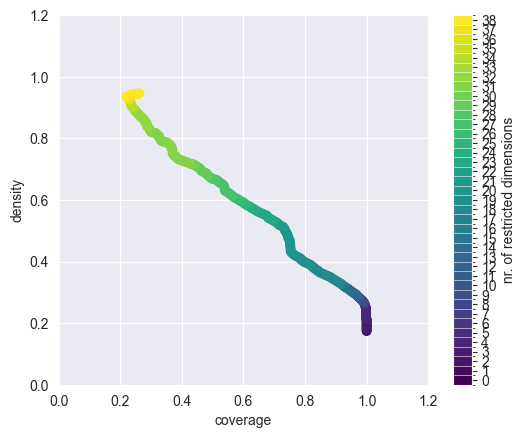

coverage       1.000000
density        0.179551
id             3.000000
k            871.000000
mass           0.970200
mean           0.179551
n           4851.000000
res_dim        2.000000
Name: 3, dtype: float64

         box 3                             
           min       max qp value  qp value
r_43 -3.616652  2.011005      NaN  0.263085
r_44 -3.409464  2.160477      NaN  0.377531


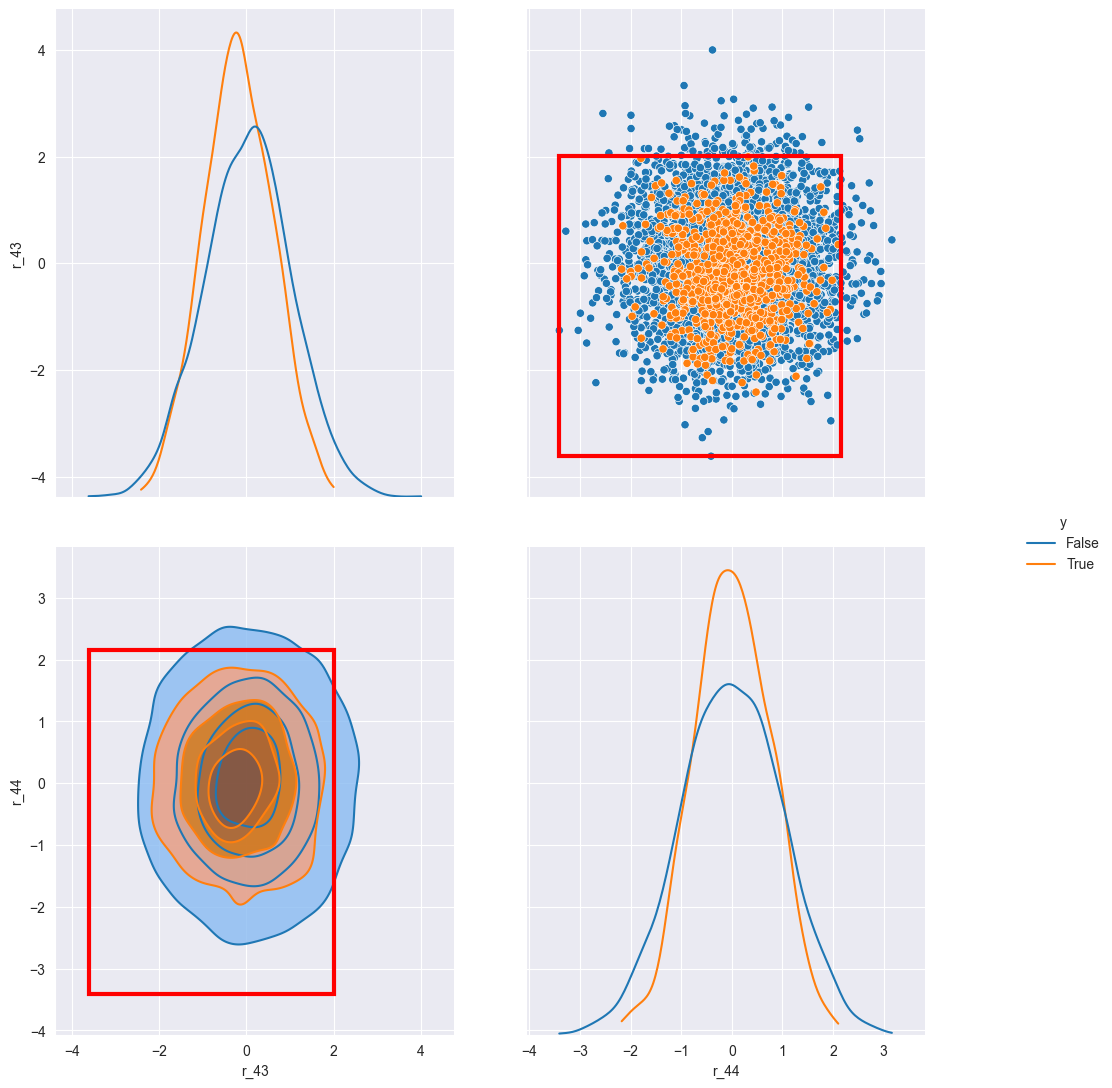

In [44]:
analyze_with_prim(rotated_experiments, y, 3, 0.9)